In [2]:
from IPython.display import Image
%matplotlib inline

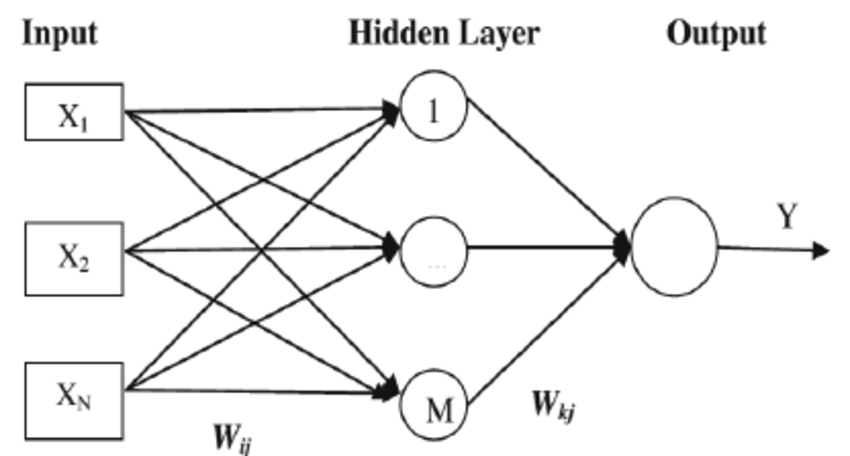

In [3]:
Image(filename='image.fnn.png',width=600)

In [8]:
import numpy as np

class NeuralNetMLP:
    def __init__(self, n_input, n_hidden, n_output, learning_rate=0.1):
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output
        self.learning_rate = learning_rate

        # Initialize weights and biases for the hidden and output layers
        self.weights_hidden = np.random.randn(n_input, n_hidden)
        self.bias_hidden = np.zeros(n_hidden)
        self.weights_output = np.random.randn(n_hidden, n_output)
        self.bias_output = np.zeros(n_output)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        # Forward pass
        self.z_hidden = np.dot(X, self.weights_hidden) + self.bias_hidden
        self.a_hidden = self.sigmoid(self.z_hidden)
        self.z_output = np.dot(self.a_hidden, self.weights_output) + self.bias_output
        self.a_output = self.sigmoid(self.z_output)
        return self.a_output

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def backward(self, X, y, output):
        # Backpropagation
        error_output = y - output
        delta_output = error_output * self.sigmoid_derivative(output)
        error_hidden = delta_output.dot(self.weights_output.T)
        delta_hidden = error_hidden * self.sigmoid_derivative(self.a_hidden)

        # Update weights and biases
        self.weights_output += self.a_hidden.T.dot(delta_output) * self.learning_rate
        self.bias_output += np.sum(delta_output, axis=0) * self.learning_rate
        self.weights_hidden += X.T.dot(delta_hidden) * self.learning_rate
        self.bias_hidden += np.sum(delta_hidden, axis=0) * self.learning_rate

    def train(self, X, y, epochs):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

if __name__ == "__main__":
    # Example usage
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    mlp = NeuralNetMLP(n_input=2, n_hidden=4, n_output=1, learning_rate=0.1)

    for i in range(10000):
        mlp.train(X, y, epochs=1)
        if i % 1000 == 0:
            error = np.mean(np.square(y - mlp.forward(X)))
            print(f"Epoch {i}, Error: {error}")

    predictions = mlp.forward(X)
    print("Predictions:")
    print(predictions)


Epoch 0, Error: 0.39102782286731136
Epoch 1000, Error: 0.12632755421422157
Epoch 2000, Error: 0.03365595910453646
Epoch 3000, Error: 0.014881287333013728
Epoch 4000, Error: 0.008915973728619252
Epoch 5000, Error: 0.006200967650568644
Epoch 6000, Error: 0.004693695763644399
Epoch 7000, Error: 0.003748926397772354
Epoch 8000, Error: 0.0031067876280399566
Epoch 9000, Error: 0.0026444624771850235
Predictions:
[[0.02071862]
 [0.95128744]
 [0.94847969]
 [0.06109546]]
